In [12]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as patches
from tqdm import tqdm
from src.feature_extraction import process_dataframe, velocity

In [ ]:
velocityDataFrame = pd.DataFrame()

filepath = 'data/PreAttentiveGaze'
session_list = os.listdir(filepath)
for session in session_list:
    participant_list = os.listdir(os.path.join(filepath, session))
    for participant in participant_list:
        for task in ["MultipleVC", "SingleVC"]:
            stimuliIndex_list = os.listdir(os.path.join(filepath, session, participant, task))
            for stimuliIndex in stimuliIndex_list:
                one_stimuli_df = pd.DataFrame()
                for block in ["Block1.tsv", "Block2.tsv", "Block3.tsv", "Block4.tsv"]:
                    dataName = f"{session}_{participant}_{task}_{stimuliIndex}_{block}"
                    data = pd.read_csv(os.path.join(filepath, session, participant, task, stimuliIndex, dataName), sep='\t')
                    data = process_dataframe(data)
                    velocities = velocity(data)
                    velocities = pd.DataFrame(velocities)
                    one_stimuli_df = pd.concat([one_stimuli_df, velocities], axis=0)
                one_stimuli_df = one_stimuli_df.reset_index(drop=True)
                one_stimuli_df = one_stimuli_df.transpose()
                one_stimuli_df["participant"] = int(participant.split('_')[1])
                velocityDataFrame = pd.concat([velocityDataFrame, one_stimuli_df], axis=0)
velocityDataFrame = velocityDataFrame.reset_index(drop=True)
velocityDataFrame.to_csv('data/velocity.tsv', sep="\t", index=False)

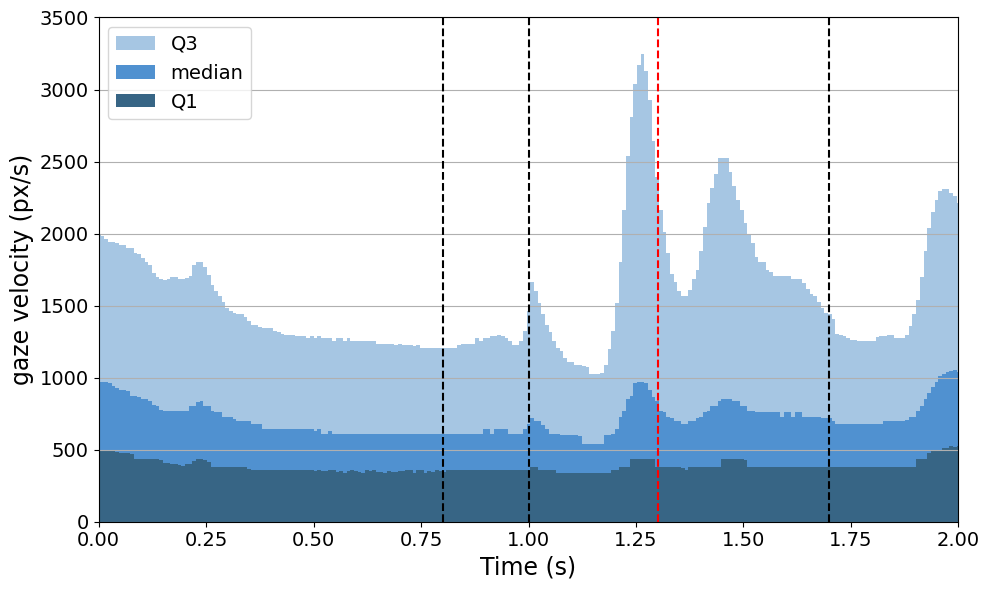

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


data = pd.read_csv("data/velocity.tsv", sep="\t")
data = data.loc[:,[f"{i}" for i in range(235)]]

data_median = data.median()
data_1q = data.quantile(0.25)
data_3q = data.quantile(0.75)
data_std = data.std()

# Generate a linear space from 0 to 0.7 with the same number of points as there are columns in the data
x_values = np.linspace(0, 2.0, data.shape[1])

color_list = ["#a6c6e3","#5091D0","#376585"]

# Plotting the histogram with the new x-values
fig, ax1 = plt.subplots(figsize=(10,6))
bar1 = ax1.bar(x_values, data_3q.values, width=0.0086, color=color_list[0], label="Q3")
bar2 = ax1.bar(x_values, data_median.values, width=0.0086, color=color_list[1], label="median")
bar3 = ax1.bar(x_values, data_1q.values, width=0.0086, color=color_list[2], label='Q1')

plt.vlines(0.8, 0, 3500, color='black', linestyle='--')
plt.vlines(1.0, 0, 3500, color='black', linestyle='--')
plt.vlines(1.3, 0, 3500, color='red', linestyle='--')
plt.vlines(1.7, 0, 3500, color='black', linestyle='--')


ax1.set_xlabel('Time (s)', fontsize=17)
ax1.set_ylabel('gaze velocity (px/s)', fontsize=17)
ax1.set_xlim(0,2)
ax1.set_ylim(0,3500)

# ax1.set_facecolor("#e8e8e8")

plt.grid(axis='y')
ax1.tick_params(axis='both', which='major', labelsize=14)
plt.legend(loc='upper left', fontsize=14)
plt.tight_layout()
plt.show()


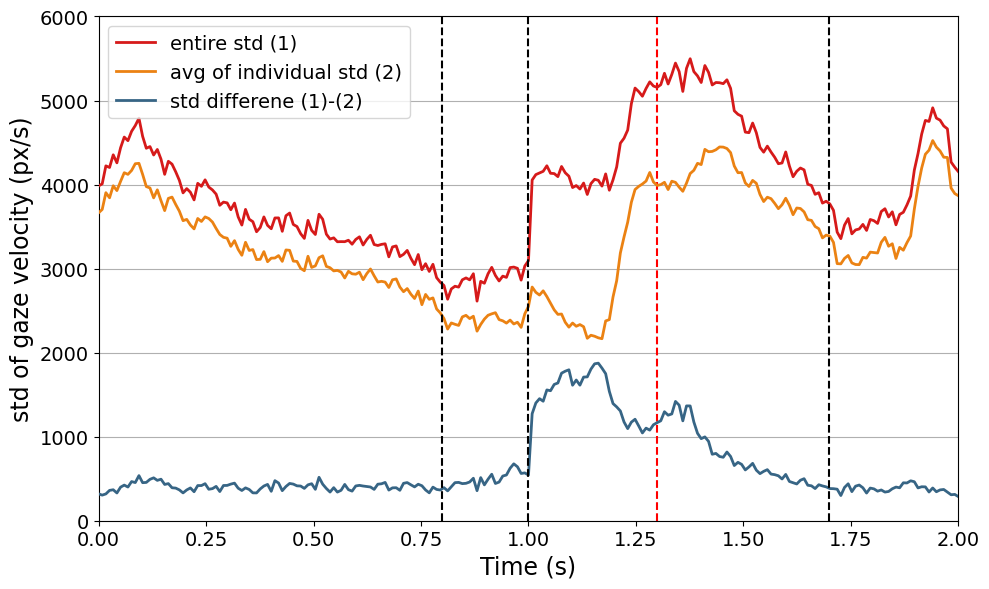

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


data = pd.read_csv("data/velocity.tsv", sep="\t")

ind_std = pd.DataFrame()
for n, i in enumerate(range(1,35)):
    p_data = data[data['participant']==i].loc[:,[f"{i}" for i in range(235)]]
    p_data_std = p_data.std()
    p_data_std_df = pd.DataFrame(p_data_std).transpose()
    ind_std = pd.concat([ind_std, p_data_std_df])

# """
data = data.loc[:,[f"{i}" for i in range(235)]]
data_std = data.std()

ind_std_avg = ind_std.mean()

# # Generate a linear space from 0 to 0.7 with the same number of points as there are columns in the data
x_values = np.linspace(0, 2.0, data.shape[1])
color_list = ["#9ba6b0","#5091D0","#376585"]

# Plotting the histogram with the new x-values
fig, ax1 = plt.subplots(figsize=(10,6))

difference_std = data_std.values - ind_std_avg.values


ax1.plot(x_values, data_std.values, color='#d61a1a', label='entire std (1)', linewidth=2, zorder=5)
ax1.plot(x_values, ind_std_avg.values, color='#eb8213', label='avg of individual std (2)', linewidth=2, zorder=4)
ax1.plot(x_values, difference_std, color=color_list[2], label='std differene (1)-(2)', linewidth=2, zorder=4)



plt.vlines(0.8, 0, 7000, color='black', linestyle='--', zorder=6)
plt.vlines(1.0, 0, 7000, color='black', linestyle='--', zorder=7)
plt.vlines(1.3, 0, 7000, color='red', linestyle='--')
plt.vlines(1.7, 0, 7000, color='black', linestyle='--', zorder=8)


ax1.set_xlabel('Time (s)', fontsize=17)
ax1.set_ylabel('std of gaze velocity (px/s)', fontsize=17)
ax1.set_xlim(0,2)
ax1.set_ylim(0,6000)
plt.grid(axis='y')

ax1.tick_params(axis='both', which='major', labelsize=14)
# ax1.set_facecolor("#e8e8e8")
plt.legend(loc='upper left', fontsize=14)
plt.tight_layout()
plt.show()

